# An analysis of my email data.


In [1]:
# Analysis of my email data
# import libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
# To load the email data
# import library for loading email data
import mailbox

In [3]:
mboxfile = 'All mail Including Spam and Trash.mbox'
mbox = mailbox.mbox(mboxfile)
mbox

In [4]:
# Next, let's see the list of available keys in the mbox data
for key in mbox[0].keys():
    print(key)

X-GM-THRID
X-Gmail-Labels
Delivered-To
Received
X-Google-Smtp-Source
X-Received
ARC-Seal
ARC-Message-Signature
ARC-Authentication-Results
Return-Path
Received
Received-SPF
Authentication-Results
DKIM-Signature
Received
From
To
Subject
Date
List-Unsubscribe
List-Unsubscribe-Post
x-CSA-Compliance-Source
MIME-Version
Reply-To
List-ID
X-CSA-Complaints
X-SFMC-Stack
x-job
Message-ID
Feedback-ID
Content-Type


In [5]:
# Data transformation
# Data Cleaning
# For our analysis, all we need is data for the following: subject,from,date,to,label,and thread.
# import csv package
import csv

In [6]:
# Converting the mailbox file to a flat file
with open('mailbox.csv', 'w') as outputfile:
    writer = csv.writer(outputfile)
    writer.writerow(['subject','from','date','to','label','thread'])
    for message in mbox:
        writer.writerow([message['subject'],
                        message['from'],
                        message['date'],
                        message['to'],
                        message['X-Gmail-Labels'],
                        message['X-GM-Thrid']])

In [11]:
# Loading the CSV file
dfs = pd.read_csv('mailbox.csv', names=['subject','from','date','to','label','thread'])

In [12]:
# Reading the first 5 samples
dfs.head()

,subject,from,date,to,label,thread
0,subject,from,date,to,label,thread
1,Now it's time to join.,"""The Rock & Roll Hall Of Fame"" <reply@email.rockhall.com>","Wed, 19 May 2021 09:48:34 -0600",<peter.okwukogu@gmail.com>,"IMAP_$NotJunk,IMAP_NotJunk,Important,Trash,Opened,Category\r\n Promotions",1700204299938101284
2,Pharma Business Review Ltd is looking for: Associate Data Scientist\r\n .,LinkedIn Job Recommendations <jobs-listings@linkedin.com>,"Thu, 20 May 2021 17:18:05 +0000 (UTC)",Peter Okwukogu <peter.okwukogu@gmail.com>,"Important,Trash,Opened,Category Social",1700298581060367146
3,=?utf-8?q?Duo=E2=80=99s_advice=3F_Practice_German_today!?=,"""Duolingo"" <hello@duolingo.com>","Wed, 19 May 2021 05:27:57 +0000",peter.okwukogu@gmail.com,"IMAP_$NotJunk,IMAP_NotJunk,Important,Trash,Opened,Category\r\n Updates",1700163305464975507
4,[pdfFiller] Thank you for registering,Sarah from pdfFiller <noreply@pdffiller.com>,"Sat, 15 May 2021 05:37:38 +0000","""peter.okwukogu@gmail.com"" <peter.okwukogu@gmail.com>","IMAP_$NotJunk,IMAP_NotJunk,Trash,Opened,Category Updates",1699801527071640225


In [13]:
# Checking the data types
dfs.dtypes

subject    object
from       object
date       object
to         object
label      object
thread     object
dtype: object

In [14]:
# The date field is in object data type
# It has to be converted to a datetime object
dfs['date'] = dfs['date'].apply(lambda x: pd.to_datetime(x, errors='coerce',utc=True))

In [15]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2540 entries, 0 to 2539
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype              
---  ------   --------------  -----              
 0   subject  2397 non-null   object             
 1   from     2540 non-null   object             
 2   date     2404 non-null   datetime64[ns, UTC]
 3   to       2361 non-null   object             
 4   label    2540 non-null   object             
 5   thread   2540 non-null   object             
dtypes: datetime64[ns, UTC](1), object(5)
memory usage: 119.2+ KB


In [16]:
# Removing NaN values
dfs['date'].isnull().sum()

136

In [19]:
dfs = dfs[dfs['date'].notna()]

In [20]:
dfs['date'].isnull().sum()

0

In [21]:
# Save the processed file into a separate csv file
dfs.to_csv('gmail.csv')

In [23]:
# Summary info of the dataframe
dfs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2404 entries, 1 to 2539
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype              
---  ------   --------------  -----              
 0   subject  2396 non-null   object             
 1   from     2404 non-null   object             
 2   date     2404 non-null   datetime64[ns, UTC]
 3   to       2360 non-null   object             
 4   label    2404 non-null   object             
 5   thread   2404 non-null   object             
dtypes: datetime64[ns, UTC](1), object(5)
memory usage: 131.5+ KB


In [24]:
# My email data contains 2,539 email with 6 columns

In [25]:
# Data refactoring
# Let's view a sample of the dataframe
dfs.head()

,subject,from,date,to,label,thread
1,Now it's time to join.,"""The Rock & Roll Hall Of Fame"" <reply@email.rockhall.com>",2021-05-19 15:48:34+00:00,<peter.okwukogu@gmail.com>,"IMAP_$NotJunk,IMAP_NotJunk,Important,Trash,Opened,Category\r\n Promotions",1700204299938101284
2,Pharma Business Review Ltd is looking for: Associate Data Scientist\r\n .,LinkedIn Job Recommendations <jobs-listings@linkedin.com>,2021-05-20 17:18:05+00:00,Peter Okwukogu <peter.okwukogu@gmail.com>,"Important,Trash,Opened,Category Social",1700298581060367146
3,=?utf-8?q?Duo=E2=80=99s_advice=3F_Practice_German_today!?=,"""Duolingo"" <hello@duolingo.com>",2021-05-19 05:27:57+00:00,peter.okwukogu@gmail.com,"IMAP_$NotJunk,IMAP_NotJunk,Important,Trash,Opened,Category\r\n Updates",1700163305464975507
4,[pdfFiller] Thank you for registering,Sarah from pdfFiller <noreply@pdffiller.com>,2021-05-15 05:37:38+00:00,"""peter.okwukogu@gmail.com"" <peter.okwukogu@gmail.com>","IMAP_$NotJunk,IMAP_NotJunk,Trash,Opened,Category Updates",1699801527071640225
5,Atlassian email verification,Atlassian <no-reply@mail.notifications.atlassian.com>,2021-05-16 20:18:09+00:00,peter.okwukogu@gmail.com,"IMAP_$NotJunk,IMAP_NotJunk,Important,Trash,Opened,Category\r\n Updates",1699947521806937456


In [26]:
# The from column contains name and email. 
# We will extract the emails.
# Regular expressions will help this refactoring

In [27]:
# import regular expressions package
import re 

In [28]:
# Create a function that takes an entire string from any column and extracts 
#an email address
def extract_email_ID(string):
    email = re.findall(r'<(.+?)>',string)
    if not email:
        email = list(filter(lambda y: '@' in y, string.split()))
    return email[0] if email else np.nan

In [29]:
# We apply this function to the from column
dfs['from'] = dfs['from'].apply(lambda x: extract_email_ID(x))

In [30]:
dfs.head()

,subject,from,date,to,label,thread
1,Now it's time to join.,reply@email.rockhall.com,2021-05-19 15:48:34+00:00,<peter.okwukogu@gmail.com>,"IMAP_$NotJunk,IMAP_NotJunk,Important,Trash,Opened,Category\r\n Promotions",1700204299938101284
2,Pharma Business Review Ltd is looking for: Associate Data Scientist\r\n .,jobs-listings@linkedin.com,2021-05-20 17:18:05+00:00,Peter Okwukogu <peter.okwukogu@gmail.com>,"Important,Trash,Opened,Category Social",1700298581060367146
3,=?utf-8?q?Duo=E2=80=99s_advice=3F_Practice_German_today!?=,hello@duolingo.com,2021-05-19 05:27:57+00:00,peter.okwukogu@gmail.com,"IMAP_$NotJunk,IMAP_NotJunk,Important,Trash,Opened,Category\r\n Updates",1700163305464975507
4,[pdfFiller] Thank you for registering,noreply@pdffiller.com,2021-05-15 05:37:38+00:00,"""peter.okwukogu@gmail.com"" <peter.okwukogu@gmail.com>","IMAP_$NotJunk,IMAP_NotJunk,Trash,Opened,Category Updates",1699801527071640225
5,Atlassian email verification,no-reply@mail.notifications.atlassian.com,2021-05-16 20:18:09+00:00,peter.okwukogu@gmail.com,"IMAP_$NotJunk,IMAP_NotJunk,Important,Trash,Opened,Category\r\n Updates",1699947521806937456


In [34]:
# We refactor the label column
# If an email is from my email address, then it is sent email
myemail = 'peter.okwukogu@gmail.com'
dfs['label'] = dfs['from'].apply(lambda x: 'sent' if x==myemail else 'inbox')

In [35]:
dfs.head()

,subject,from,date,to,label,thread
1,Now it's time to join.,reply@email.rockhall.com,2021-05-19 15:48:34+00:00,<peter.okwukogu@gmail.com>,inbox,1700204299938101284
2,Pharma Business Review Ltd is looking for: Associate Data Scientist\r\n .,jobs-listings@linkedin.com,2021-05-20 17:18:05+00:00,Peter Okwukogu <peter.okwukogu@gmail.com>,inbox,1700298581060367146
3,=?utf-8?q?Duo=E2=80=99s_advice=3F_Practice_German_today!?=,hello@duolingo.com,2021-05-19 05:27:57+00:00,peter.okwukogu@gmail.com,inbox,1700163305464975507
4,[pdfFiller] Thank you for registering,noreply@pdffiller.com,2021-05-15 05:37:38+00:00,"""peter.okwukogu@gmail.com"" <peter.okwukogu@gmail.com>",inbox,1699801527071640225
5,Atlassian email verification,no-reply@mail.notifications.atlassian.com,2021-05-16 20:18:09+00:00,peter.okwukogu@gmail.com,inbox,1699947521806937456


In [36]:
dfs.tail()

,subject,from,date,to,label,thread
2535,6 new jobs for 'data scientist intern',jobalerts-noreply@linkedin.com,2021-04-09 00:02:05+00:00,Peter Okwukogu <peter.okwukogu@gmail.com>,inbox,1696518925186195994
2536,Updated invitation: Global AI Hub - Introduction to Machine Learning\r\n @ Daily from 7pm to 9pm from Tue Nov 10 to Fri Nov 13 (WAT) (peter.okwukogu@gmail.com),esma.cinokur@globalaihub.com,2020-11-10 13:40:46+00:00,peter.okwukogu@gmail.com,inbox,1682980886414890443
2537,Opportunity: Call for super teachers!,aiplus@datasciencenigeria.ai,2020-07-30 08:01:17+00:00,ai plus <aiplus@datasciencenigeria.ai>,inbox,1673628048797176248
2538,=?UTF-8?Q?So_you_want_to_host_a_Cloud_Study_Jam=E2=80=A6?=,smiskin@google.com,2021-03-12 10:40:05+00:00,Emily Linde <lindee@google.com>,inbox,1694022361610793449
2539,Revolut is looking for: FP&A Data Analyst - Portugal.,jobs-listings@linkedin.com,2021-05-06 17:17:24+00:00,Peter Okwukogu <peter.okwukogu@gmail.com>,inbox,1699030182151809320


In [37]:
# Dropping Columns
# The 'to' column only contains my email.
# The column is irrelivant
dfs.drop(columns='to',inplace=True)

In [38]:
dfs.head()

,subject,from,date,label,thread
1,Now it's time to join.,reply@email.rockhall.com,2021-05-19 15:48:34+00:00,inbox,1700204299938101284
2,Pharma Business Review Ltd is looking for: Associate Data Scientist\r\n .,jobs-listings@linkedin.com,2021-05-20 17:18:05+00:00,inbox,1700298581060367146
3,=?utf-8?q?Duo=E2=80=99s_advice=3F_Practice_German_today!?=,hello@duolingo.com,2021-05-19 05:27:57+00:00,inbox,1700163305464975507
4,[pdfFiller] Thank you for registering,noreply@pdffiller.com,2021-05-15 05:37:38+00:00,inbox,1699801527071640225
5,Atlassian email verification,no-reply@mail.notifications.atlassian.com,2021-05-16 20:18:09+00:00,inbox,1699947521806937456


In [39]:
# Refactoring Timezones
# import time and date packages
import datetime
import pytz

In [40]:
# Function for refactoring time zones
def refactor_timezone(x):
    est = pytz.timezone('Africa/Lagos')
    return x.astimezone(est)

In [41]:
# List of all time zones
# pytz.all_timezones

In [42]:
# Refactor the date column using the refactor_timezone function
dfs['date'] = dfs['date'].apply(lambda x: refactor_timezone(x))

In [43]:
dfs.head()

,subject,from,date,label,thread
1,Now it's time to join.,reply@email.rockhall.com,2021-05-19 16:48:34+01:00,inbox,1700204299938101284
2,Pharma Business Review Ltd is looking for: Associate Data Scientist\r\n .,jobs-listings@linkedin.com,2021-05-20 18:18:05+01:00,inbox,1700298581060367146
3,=?utf-8?q?Duo=E2=80=99s_advice=3F_Practice_German_today!?=,hello@duolingo.com,2021-05-19 06:27:57+01:00,inbox,1700163305464975507
4,[pdfFiller] Thank you for registering,noreply@pdffiller.com,2021-05-15 06:37:38+01:00,inbox,1699801527071640225
5,Atlassian email verification,no-reply@mail.notifications.atlassian.com,2021-05-16 21:18:09+01:00,inbox,1699947521806937456


In [44]:
# Convert the day of the week into names of the day of the week
dfs['dayofweek'] = dfs['date'].apply(lambda x: x.day_name())

In [45]:
dfs.head()

,subject,from,date,label,thread,dayofweek
1,Now it's time to join.,reply@email.rockhall.com,2021-05-19 16:48:34+01:00,inbox,1700204299938101284,Wednesday
2,Pharma Business Review Ltd is looking for: Associate Data Scientist\r\n .,jobs-listings@linkedin.com,2021-05-20 18:18:05+01:00,inbox,1700298581060367146,Thursday
3,=?utf-8?q?Duo=E2=80=99s_advice=3F_Practice_German_today!?=,hello@duolingo.com,2021-05-19 06:27:57+01:00,inbox,1700163305464975507,Wednesday
4,[pdfFiller] Thank you for registering,noreply@pdffiller.com,2021-05-15 06:37:38+01:00,inbox,1699801527071640225,Saturday
5,Atlassian email verification,no-reply@mail.notifications.atlassian.com,2021-05-16 21:18:09+01:00,inbox,1699947521806937456,Sunday


In [46]:
dfs.dtypes

subject                            object
from                               object
date         datetime64[ns, Africa/Lagos]
label                              object
thread                             object
dayofweek                          object
dtype: object

In [47]:
# Convert to category
dfs['dayofweek'] = dfs.dayofweek.astype('category')

In [48]:
# Refactor for time of day
dfs['timeofday'] = dfs['date'].apply(lambda x: x.hour + x.minute/60 + x.second/3600)

In [49]:
dfs.head()

,subject,from,date,label,thread,dayofweek,timeofday
1,Now it's time to join.,reply@email.rockhall.com,2021-05-19 16:48:34+01:00,inbox,1700204299938101284,Wednesday,16.809444
2,Pharma Business Review Ltd is looking for: Associate Data Scientist\r\n .,jobs-listings@linkedin.com,2021-05-20 18:18:05+01:00,inbox,1700298581060367146,Thursday,18.301389
3,=?utf-8?q?Duo=E2=80=99s_advice=3F_Practice_German_today!?=,hello@duolingo.com,2021-05-19 06:27:57+01:00,inbox,1700163305464975507,Wednesday,6.465833
4,[pdfFiller] Thank you for registering,noreply@pdffiller.com,2021-05-15 06:37:38+01:00,inbox,1699801527071640225,Saturday,6.627222
5,Atlassian email verification,no-reply@mail.notifications.atlassian.com,2021-05-16 21:18:09+01:00,inbox,1699947521806937456,Sunday,21.302500


In [50]:
# Refactor for hour
dfs['hour'] = dfs['date'].apply(lambda x: x.hour)

In [51]:
dfs.head()

,subject,from,date,label,thread,dayofweek,timeofday,hour
1,Now it's time to join.,reply@email.rockhall.com,2021-05-19 16:48:34+01:00,inbox,1700204299938101284,Wednesday,16.809444,16
2,Pharma Business Review Ltd is looking for: Associate Data Scientist\r\n .,jobs-listings@linkedin.com,2021-05-20 18:18:05+01:00,inbox,1700298581060367146,Thursday,18.301389,18
3,=?utf-8?q?Duo=E2=80=99s_advice=3F_Practice_German_today!?=,hello@duolingo.com,2021-05-19 06:27:57+01:00,inbox,1700163305464975507,Wednesday,6.465833,6
4,[pdfFiller] Thank you for registering,noreply@pdffiller.com,2021-05-15 06:37:38+01:00,inbox,1699801527071640225,Saturday,6.627222,6
5,Atlassian email verification,no-reply@mail.notifications.atlassian.com,2021-05-16 21:18:09+01:00,inbox,1699947521806937456,Sunday,21.302500,21


In [52]:
# Refactor for year integer
dfs['year_int'] = dfs['date'].apply(lambda x: x.year)

In [53]:
dfs.head()

,subject,from,date,label,thread,dayofweek,timeofday,hour,year_int
1,Now it's time to join.,reply@email.rockhall.com,2021-05-19 16:48:34+01:00,inbox,1700204299938101284,Wednesday,16.809444,16,2021
2,Pharma Business Review Ltd is looking for: Associate Data Scientist\r\n .,jobs-listings@linkedin.com,2021-05-20 18:18:05+01:00,inbox,1700298581060367146,Thursday,18.301389,18,2021
3,=?utf-8?q?Duo=E2=80=99s_advice=3F_Practice_German_today!?=,hello@duolingo.com,2021-05-19 06:27:57+01:00,inbox,1700163305464975507,Wednesday,6.465833,6,2021
4,[pdfFiller] Thank you for registering,noreply@pdffiller.com,2021-05-15 06:37:38+01:00,inbox,1699801527071640225,Saturday,6.627222,6,2021
5,Atlassian email verification,no-reply@mail.notifications.atlassian.com,2021-05-16 21:18:09+01:00,inbox,1699947521806937456,Sunday,21.302500,21,2021


In [54]:
# Refactor for year fraction
dfs['year'] = dfs['date'].apply(lambda x: x.year + x.dayofyear/365.25)

In [55]:
dfs.head()

,subject,from,date,label,thread,dayofweek,timeofday,hour,year_int,year
1,Now it's time to join.,reply@email.rockhall.com,2021-05-19 16:48:34+01:00,inbox,1700204299938101284,Wednesday,16.809444,16,2021,2021.380561
2,Pharma Business Review Ltd is looking for: Associate Data Scientist\r\n .,jobs-listings@linkedin.com,2021-05-20 18:18:05+01:00,inbox,1700298581060367146,Thursday,18.301389,18,2021,2021.383299
3,=?utf-8?q?Duo=E2=80=99s_advice=3F_Practice_German_today!?=,hello@duolingo.com,2021-05-19 06:27:57+01:00,inbox,1700163305464975507,Wednesday,6.465833,6,2021,2021.380561
4,[pdfFiller] Thank you for registering,noreply@pdffiller.com,2021-05-15 06:37:38+01:00,inbox,1699801527071640225,Saturday,6.627222,6,2021,2021.369610
5,Atlassian email verification,no-reply@mail.notifications.atlassian.com,2021-05-16 21:18:09+01:00,inbox,1699947521806937456,Sunday,21.302500,21,2021,2021.372348


In [56]:
# Set date to index
dfs.index = dfs['date']

In [57]:
dfs.head()

,subject,from,date,label,thread,dayofweek,timeofday,hour,year_int,year
date,,,,,,,,,,
2021-05-19 16:48:34+01:00,Now it's time to join.,reply@email.rockhall.com,2021-05-19 16:48:34+01:00,inbox,1700204299938101284,Wednesday,16.809444,16,2021,2021.380561
2021-05-20 18:18:05+01:00,Pharma Business Review Ltd is looking for: Associate Data Scientist\r\n .,jobs-listings@linkedin.com,2021-05-20 18:18:05+01:00,inbox,1700298581060367146,Thursday,18.301389,18,2021,2021.383299
2021-05-19 06:27:57+01:00,=?utf-8?q?Duo=E2=80=99s_advice=3F_Practice_German_today!?=,hello@duolingo.com,2021-05-19 06:27:57+01:00,inbox,1700163305464975507,Wednesday,6.465833,6,2021,2021.380561
2021-05-15 06:37:38+01:00,[pdfFiller] Thank you for registering,noreply@pdffiller.com,2021-05-15 06:37:38+01:00,inbox,1699801527071640225,Saturday,6.627222,6,2021,2021.369610
2021-05-16 21:18:09+01:00,Atlassian email verification,no-reply@mail.notifications.atlassian.com,2021-05-16 21:18:09+01:00,inbox,1699947521806937456,Sunday,21.302500,21,2021,2021.372348


In [58]:
# Delete the date column because it's no longer relevant
del dfs['date']

In [59]:
dfs.head()

,subject,from,label,thread,dayofweek,timeofday,hour,year_int,year
date,,,,,,,,,
2021-05-19 16:48:34+01:00,Now it's time to join.,reply@email.rockhall.com,inbox,1700204299938101284,Wednesday,16.809444,16,2021,2021.380561
2021-05-20 18:18:05+01:00,Pharma Business Review Ltd is looking for: Associate Data Scientist\r\n .,jobs-listings@linkedin.com,inbox,1700298581060367146,Thursday,18.301389,18,2021,2021.383299
2021-05-19 06:27:57+01:00,=?utf-8?q?Duo=E2=80=99s_advice=3F_Practice_German_today!?=,hello@duolingo.com,inbox,1700163305464975507,Wednesday,6.465833,6,2021,2021.380561
2021-05-15 06:37:38+01:00,[pdfFiller] Thank you for registering,noreply@pdffiller.com,inbox,1699801527071640225,Saturday,6.627222,6,2021,2021.369610
2021-05-16 21:18:09+01:00,Atlassian email verification,no-reply@mail.notifications.atlassian.com,inbox,1699947521806937456,Sunday,21.302500,21,2021,2021.372348


### Data Analysis
This is the most important part of EDA. This is the part where we gain insights from thedata that we have.Let's answer the following questions one by 

1. How many emails did I send during a given timeframe? 

2. At what times of the day do I send and receive emails with Gmail?

3. What is the average number of emails per day?

4. What is the average number of emails per hour?

5. Whom do I communicate with most frequently?

6. What are the most active emailing days?

7. What am I mostly emailing about?

In [60]:
# 1.How many emails did I send during a given timeframe?
print(dfs.index.min().strftime('%a, %d %b %Y %I:%M %p'))
print(dfs.index.max().strftime('%a, %d %b %Y %I:%M %p'))

Wed, 17 Jul 2013 05:23 AM
Sat, 22 May 2021 12:34 AM


In [61]:
# Count sent and received emails
print(dfs['label'].value_counts())

inbox    2114
sent      290
Name: label, dtype: int64


In [62]:
# 2.At what times of the day do I send and receive emails with Gmail?
# Create graph to view sent and recieved emails
# Create two sub dataframes
sent = dfs[dfs['label']=='sent']
received = dfs[dfs['label']=='inbox']

In [63]:
# import required libraries for graphing
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib.ticker import FixedLocator
from scipy import ndimage
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpaches

In [64]:
# Create a function that takes a dataframe as an input and creates a plot
def plot_todo_vs_year(df, ax, color='C0', s=0.5, title=''):
    ind = np.zeros(len(df), dtype='bool')
    est = pytz.timezone('Africa/Lagos')
    df[~ind].plot.scatter('year', 'timeofday', s=s,
                          alpha=0.6, ax=ax, color=color)
    ax.set_ylim(0, 24)
    ax.yaxis.set_major_locator(MaxNLocator(8))
    ax.set_yticklabels([datetime.datetime.strptime(
        str(int(np.mod(ts, 24))), '%H').strftime('%I %p') for ts in ax.get_yticks()]);
    
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_title(title)
    ax.grid(ls=':',color='k')
    
    return ax

/var/folders/8j/c5z8pgbx2_d9z8bpfdzmb7d00000gn/T/ipykernel_5838/3154128358.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([datetime.datetime.strptime(


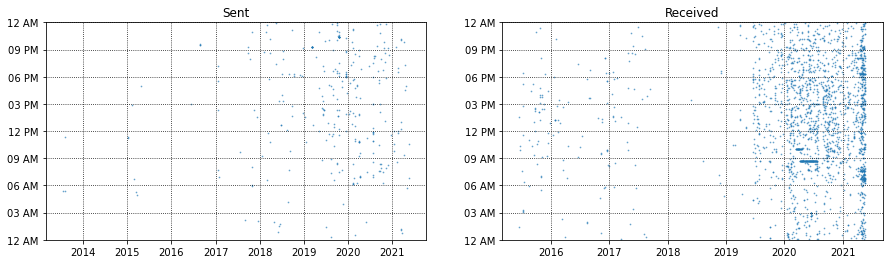

In [65]:
# Plot both received and sent emails
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(15,4))
plot_todo_vs_year(sent, ax[0], title='Sent')
plot_todo_vs_year(received, ax[1], title='Received');

In [66]:
# 3. What is the average number of emails per day?
# Create a function that counts the total number of emails per day
def plot_number_perday_per_year(df,ax,label=None,dt=0.3,**plot_kwargs):
    year = df[df['year'].notna()]['year'].values
    T = year.max()-year.min()
    bins = int(T/dt)
    weights = 1/(np.ones_like(year)*dt*365.25)
    ax.hist(year,bins=bins,weights=weights,label=label,**plot_kwargs);
    ax.grid(ls=':',color='k')

In [67]:
# Create a function that plots the average number of emails per day
def plot_number_perdhour_per_year(df, ax, label=None, dt=1, smooth=False,weight_fun=None, **plot_kwargs):    
    tod = df[df['timeofday'].notna()]['timeofday'].values    
    year = df[df['year'].notna()]['year'].values    
    Ty = year.max() - year.min()    
    T = tod.max() - tod.min()    
    bins = int(T / dt) 
    if weight_fun is None:
        weights = 1 / (np.ones_like(tod) * Ty * 365.25 / dt) 
    else:
        weights = weight_fun(df) 
    if smooth:        
        hst, xedges = np.histogram(tod, bins=bins, weights=weights);        
        x = np.delete(xedges, -1) + 0.5*(xedges[1] - xedges[0])        
        hst = ndimage.gaussian_filter(hst, sigma=0.75)        
        f = interp1d(x, hst, kind='cubic')        
        x = np.linspace(x.min(), x.max(), 10000)        
        hst = f(x)        
        ax.plot(x, hst, label=label, **plot_kwargs) 
    else:        
        ax.hist(tod, bins=bins, weights=weights, label=label, **plot_kwargs);    
        ax.grid(ls=':', color='k')    
        orientation = plot_kwargs.get('orientation') 
        if orientation is None or orientation == 'vertical':        
            ax.set_xlim(0, 24)        
            ax.xaxis.set_major_locator(MaxNLocator(8))
            ax.set_xticklabels([datetime.datetime.strptime(str(int(np.mod(ts, 24))), "%H").strftime("%I %p") 
                                                                          for ts in ax.get_xticks()]); 
        elif orientation == 'horizontal':        
            ax.set_ylim(0, 24)        
            ax.yaxis.set_major_locator(MaxNLocator(8))
            ax.set_yticklabels([datetime.datetime.strptime(str(int(np.mod(ts,24))), "%H").strftime("%I %p")
                            for ts in ax.get_yticks()]);

In [68]:
# Create a class that plots the time of the day versus year for all the emails within the given timeframe
class TriplePlot:  
    def __init__(self):   
        gs = gridspec.GridSpec(6, 6)    
        self.ax1 = plt.subplot(gs[2:6, :4])    
        self.ax2 = plt.subplot(gs[2:6, 4:6], sharey=self.ax1)    
        plt.setp(self.ax2.get_yticklabels(), visible=False);    
        self.ax3 = plt.subplot(gs[:2, :4])    
        plt.setp(self.ax3.get_xticklabels(), visible=False);  
        
    def plot(self, df, color='darkblue', alpha=0.8, markersize=0.5,yr_bin=0.1, hr_bin=0.5):    
        plot_todo_vs_year(df, self.ax1, color=color, s=markersize)    
        plot_number_perdhour_per_year(df, self.ax2, dt=hr_bin,color=color, alpha=alpha, orientation='horizontal')    
        self.ax2.set_xlabel('Average emails per hour')    
        plot_number_perday_per_year(df, self.ax3, dt=yr_bin,color=color, alpha=alpha)    
        self.ax3.set_ylabel('Average emails per day')

/var/folders/8j/c5z8pgbx2_d9z8bpfdzmb7d00000gn/T/ipykernel_5838/3154128358.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([datetime.datetime.strptime(
/var/folders/8j/c5z8pgbx2_d9z8bpfdzmb7d00000gn/T/ipykernel_5838/3334370523.py:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([datetime.datetime.strptime(str(int(np.mod(ts,24))), "%H").strftime("%I %p")


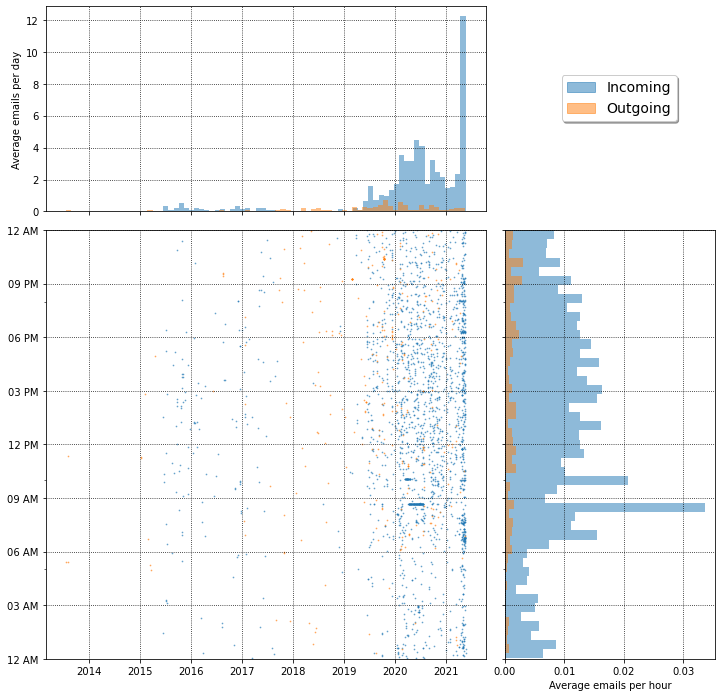

In [69]:
# Instantiate the class to plot the graph
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches
plt.figure(figsize=(12,12));
tpl = TriplePlot()
tpl.plot(received, color='C0', alpha=0.5)
tpl.plot(sent, color='C1', alpha=0.5)
p1 = mpatches.Patch(color='C0', label='Incoming', alpha=0.5)
p2 = mpatches.Patch(color='C1', label='Outgoing', alpha=0.5)
plt.legend(handles=[p1, p2], bbox_to_anchor=[1.45, 0.7],fontsize=14, shadow=True);

<AxesSubplot:>

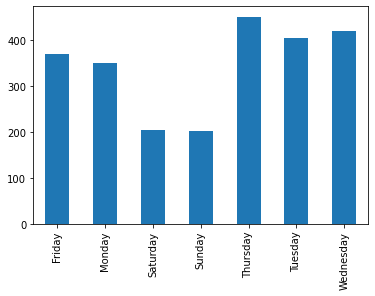

In [70]:
# 4. What is the average number of emails per hour?
counts = dfs.dayofweek.value_counts(sort=False)
counts.plot(kind='bar')

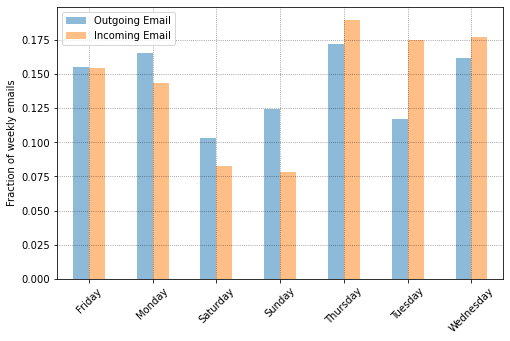

In [71]:
# 5.The most active days for receiving and sending emails separately
sdw = sent.groupby('dayofweek').size()/len(sent)
rdw = received.groupby('dayofweek').size()/len(received)

df_tmp = pd.DataFrame(data={'Outgoing Email':sdw, 'Incoming Email':rdw})
df_tmp.plot(kind='bar',rot=45,figsize=(8,5),alpha=0.5)
plt.xlabel('');
plt.ylabel('Fraction of weekly emails');
plt.grid(ls=':',color='k',alpha=0.5)

In [72]:
# 6. The most active time of day for email communication
import scipy.ndimage
from scipy.interpolate import interp1d

In [73]:
dfs.dtypes

subject        object
from           object
label          object
thread         object
dayofweek    category
timeofday     float64
hour            int64
year_int        int64
year          float64
dtype: object

In [74]:
# Convert this to a Category dtype before running the next cell
#dfs['dayofweek'] = dfs.dayofweek.astype('category')

In [75]:
import warnings
warnings.filterwarnings("ignore")

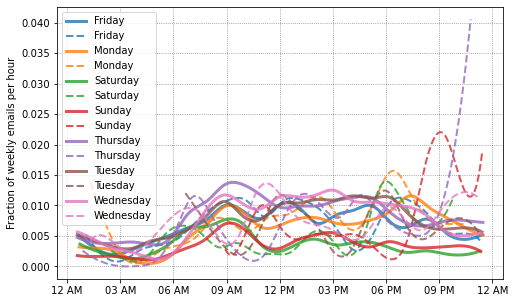

In [76]:
plt.figure(figsize=(8, 5))
ax = plt.subplot(111)
for ct, dow in enumerate(dfs.dayofweek.cat.categories):
    df_r = received[received['dayofweek'] == dow]
    weights = np.ones(len(df_r))/len(received)
    def wfun(x): return weights
    plot_number_perdhour_per_year(
        df_r, ax, dt=1, smooth=True, color=f'C{ct}', alpha=0.8, lw=3, label=dow, weight_fun=wfun)

    df_s = sent[sent['dayofweek'] == dow]
    weights = np.ones(len(df_s)) / len(sent)
    def wfun(x): return weights
    plot_number_perdhour_per_year(
        df_s, ax, dt=1, smooth=True, color=f'C{ct}', alpha=0.8, lw=2, label=dow, ls='--', weight_fun=wfun)
    ax.set_ylabel('Fraction of weekly emails per hour')
    ax.xaxis.set_major_locator(MaxNLocator(10))
    ax.set_xticklabels([datetime.datetime.strptime(
        str(int(np.mod(ts, 24))), "%H").strftime("%I %p") for ts in ax.get_xticks()])
    plt.legend(loc='upper left')
    plt.grid(ls=':',color='k',alpha=0.5)

In [79]:
# 7. What am I mostly emailing about?
from wordcloud import WordCloud

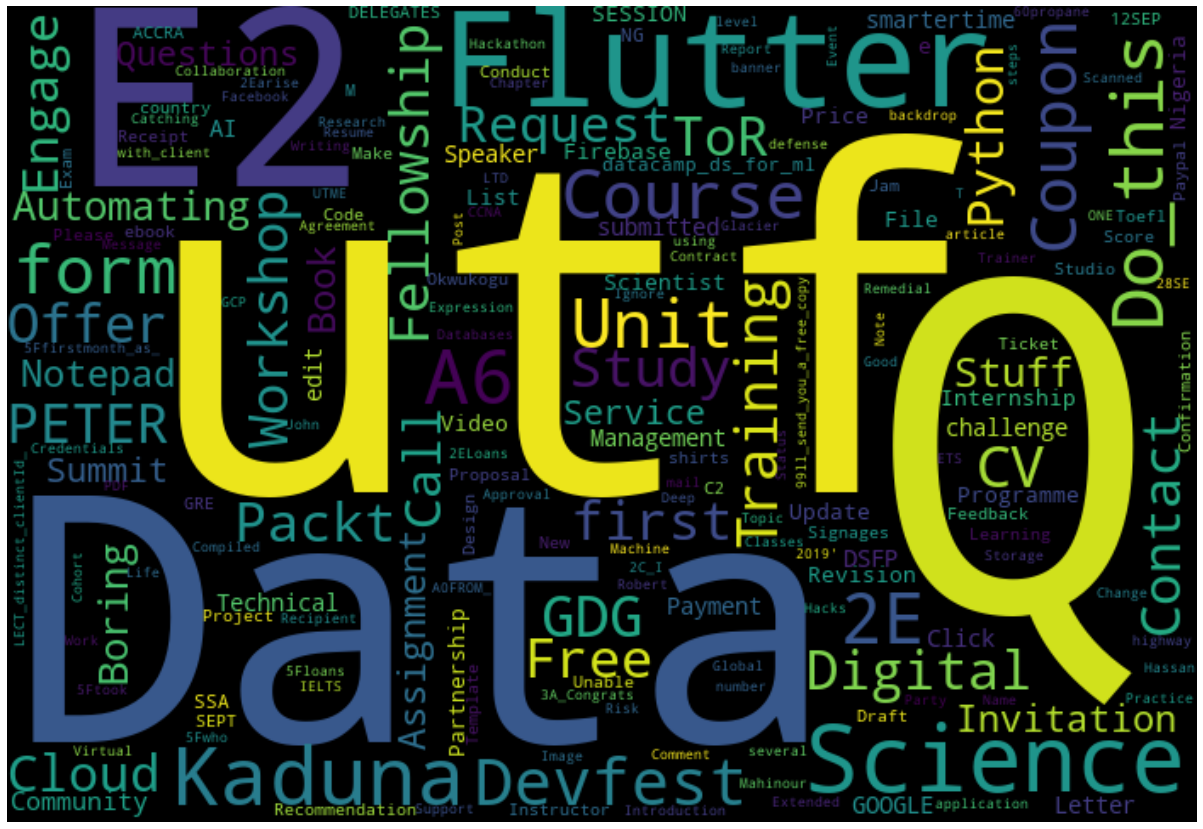

In [80]:
df_no_arxiv = dfs[dfs['from'] != 'no-reply@arXiv.org']
text = ' '.join(map(str, sent['subject'].values))
stopwords = ['Re', 'Fwd', '3A_']
wrd = WordCloud(width=700, height=480, margin=0, collocations=False)
for sw in stopwords:    
    wrd.stopwords.add(sw)
    wordcloud = wrd.generate(text)

plt.figure(figsize=(25,15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)